# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [4]:
###Background: 
#Use care inventory is an asset that has potential to be upsold if factors that resonate with buyers are identified

In [6]:
#Business Objectives: Increase sales of use cars

In [8]:
#Business Success Criteria: Higher sales of user car inventory

In [10]:
#Business case: The business case is to find out factors that impact price of a use car.
#Inventory of Resources Requirements, Assumptions and Constraints: When a seller decides to sell a car its not known who is the best buyer for it
#Risks and Contingencies : Trends in car industry can change and impact analysis done 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [13]:
#steps that you would take to get to know the dataset and identify any quality issues within
# High level: What are the rows, what are the columns of the dataset, and how much of the data is actually useful? What data are we missing?
# Key generic steps: reading, querying, visualizing, aggregating, and filtering our data. 
# Step1: load the data, get info
# Step2: handle missing data, null data
# Step3: Convert columns with string data into numeric
# Step4: Encode categorical features 


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [16]:
df = pd.read_csv('data/vehicles.csv')
df

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

In [17]:
df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [18]:
df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [21]:
missing_values = df.isnull().sum()
missing_values

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [27]:
df['VIN'].fillna('Unknown', inplace=True)

In [29]:
#immutate  column
df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['drive'].fillna(df['drive'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['paint_color'].fillna(df['paint_color'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['odometer'].fillna(df['odometer'].mode()[0], inplace=True)

print(df.columns)



Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [31]:
df.drop(columns=['id','model', 'VIN'], inplace=True)
df

region  price    year manufacturer condition  \
0                     prescott   6000  2017.0         ford      good   
1                 fayetteville  11900  2017.0         ford      good   
2                 florida keys  21000  2017.0         ford      good   
3       worcester / central MA   1500  2017.0         ford      good   
4                   greensboro   4900  2017.0         ford      good   
...                        ...    ...     ...          ...       ...   
426875                 wyoming  23590  2019.0       nissan      good   
426876                 wyoming  30590  2020.0        volvo      good   
426877                 wyoming  34990  2020.0     cadillac      good   
426878                 wyoming  28990  2018.0        lexus      good   
426879                 wyoming  30590  2019.0          bmw      good   

          cylinders    fuel  odometer title_status transmission drive  \
0       6 cylinders     NaN  100000.0        clean    automatic   4wd   
1       6 cylinders     NaN  100000.0        clean    automatic   4wd   
2       6 cylinders     NaN  100000.0        clean    automatic   4wd   
3       6 cylinders     NaN  100000.0        clean    automatic   4wd   
4       6 cylinders     NaN  100000.0        clean    automatic   4wd   
...             ...     ...       ...          ...          ...   ...   
426875  6 cylinders     gas   32226.0        clean        other   fwd   
426876  6 cylinders     gas   12029.0        clean        other   fwd   
426877  6 cylinders  diesel    4174.0        clean        other   4wd   
426878  6 cylinders     gas   30112.0        clean        other   fwd   
426879  6 cylinders     gas   22716.0        clean        other   rwd   

             size       type paint_color state  
0       full-size      sedan       white    az  
1       full-size      sedan       white    ar  
2       full-size      sedan       white    fl  
3       full-size      sedan       white    ma  
4       full-size      sedan       white    nc  
...           ...        ...         ...   ...  
426875  full-size      sedan       white    wy  
426876  full-size      sedan         red    wy  
426877  full-size  hatchback       white    wy  
426878  full-size      sedan      silver    wy  
426879  full-size      coupe       white    wy  

[426880 rows x 15 columns]

In [33]:
#df_encoded= pd.get_dummies(df, drop_first=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

columns_encode = ['manufacturer','fuel','drive','paint_color','condition','size','region','state','cylinders','title_status','transmission','type']
lab_enc = {}
for col_ in columns_encode:
    le = LabelEncoder()
    df[col_] = le.fit_transform(df[col_])
    lab_enc[col_] = le
df.head()

region  price    year  manufacturer  condition  cylinders  fuel  odometer  \
0     277   6000  2017.0            13          2          5     5  100000.0   
1     105  11900  2017.0            13          2          5     5  100000.0   
2     111  21000  2017.0            13          2          5     5  100000.0   
3     396   1500  2017.0            13          2          5     5  100000.0   
4     131   4900  2017.0            13          2          5     5  100000.0   

   title_status  transmission  drive  size  type  paint_color  state  
0             0             0      0     1     9           10      3  
1             0             0      0     1     9           10      2  
2             0             0      0     1     9           10      9  
3             0             0      0     1     9           10     19  
4             0             0      0     1     9           10     27

In [38]:
#px.line(df_, x = "year", y = "price", color = "manufacturer")

In [40]:
#sns.pairplot(df[['region', 'price', 'manufacturer',
#                      'model', 'odometer', 'state','year']], hue = 'year')

In [42]:
#df_.plot(x='price',kind='bar')
#fig, axs = plt.subplots(nrows=3, figsize=(12,15))
df.columns


Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

In [44]:
df.shape

(426880, 15)

In [46]:
df.duplicated().sum()


57583

In [48]:
df.nunique()

region             404
price            15655
year               114
manufacturer        42
condition            6
cylinders            8
fuel                 6
odometer        104870
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [50]:
#1: There are 426880 rows and 18 features in the dataset.
#2: There are no null values in the dataset.
#3: Out of 18 features 8 are numeric features and rest are categorical features
#4: There are no duplicate values in total in the dataset.

In [52]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

### print columns
print(f"We have {len(numeric_features)} numeric_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 15 numeric_features: ['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
We have 0 categorical_features: []


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [57]:
### proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------------------")

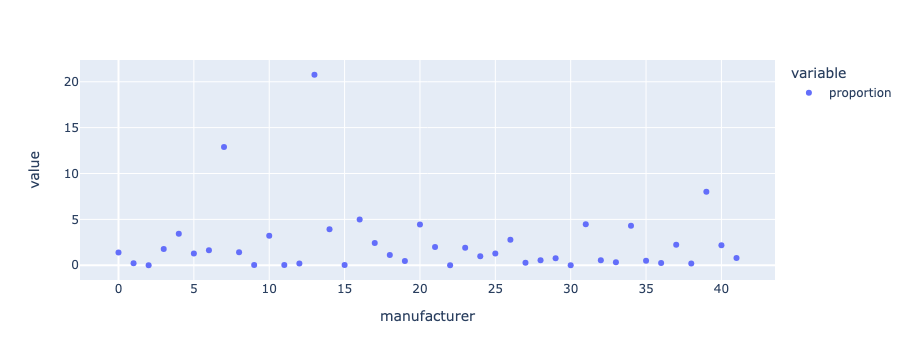

In [59]:
px.scatter(df['manufacturer'].value_counts(normalize=True)*100)

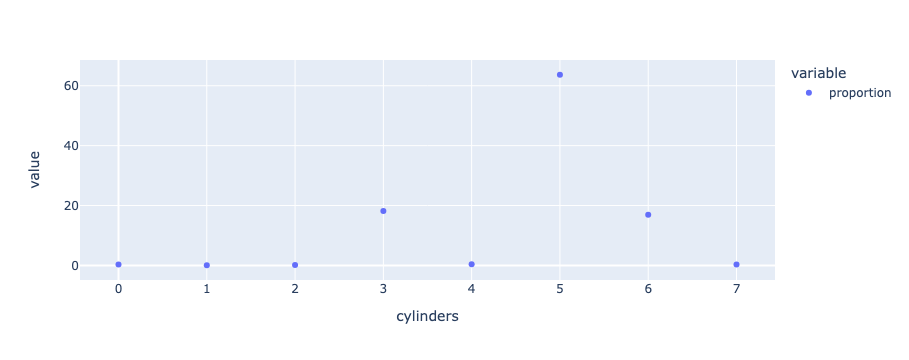

In [61]:
px.scatter(df['cylinders'].value_counts(normalize=True)*100)

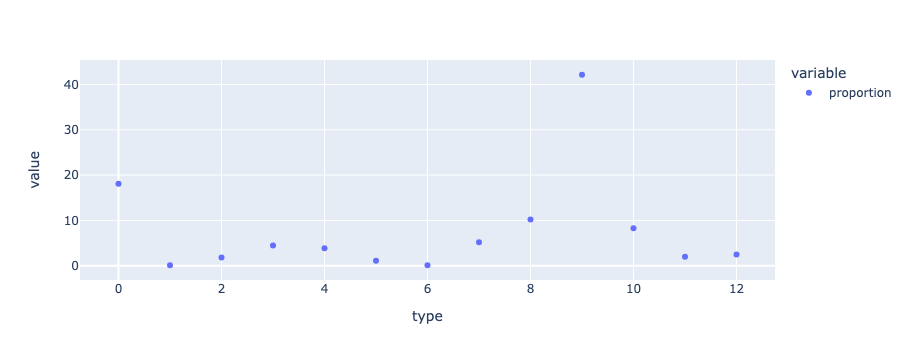

In [63]:
px.scatter(df['type'].value_counts(normalize=True)*100)

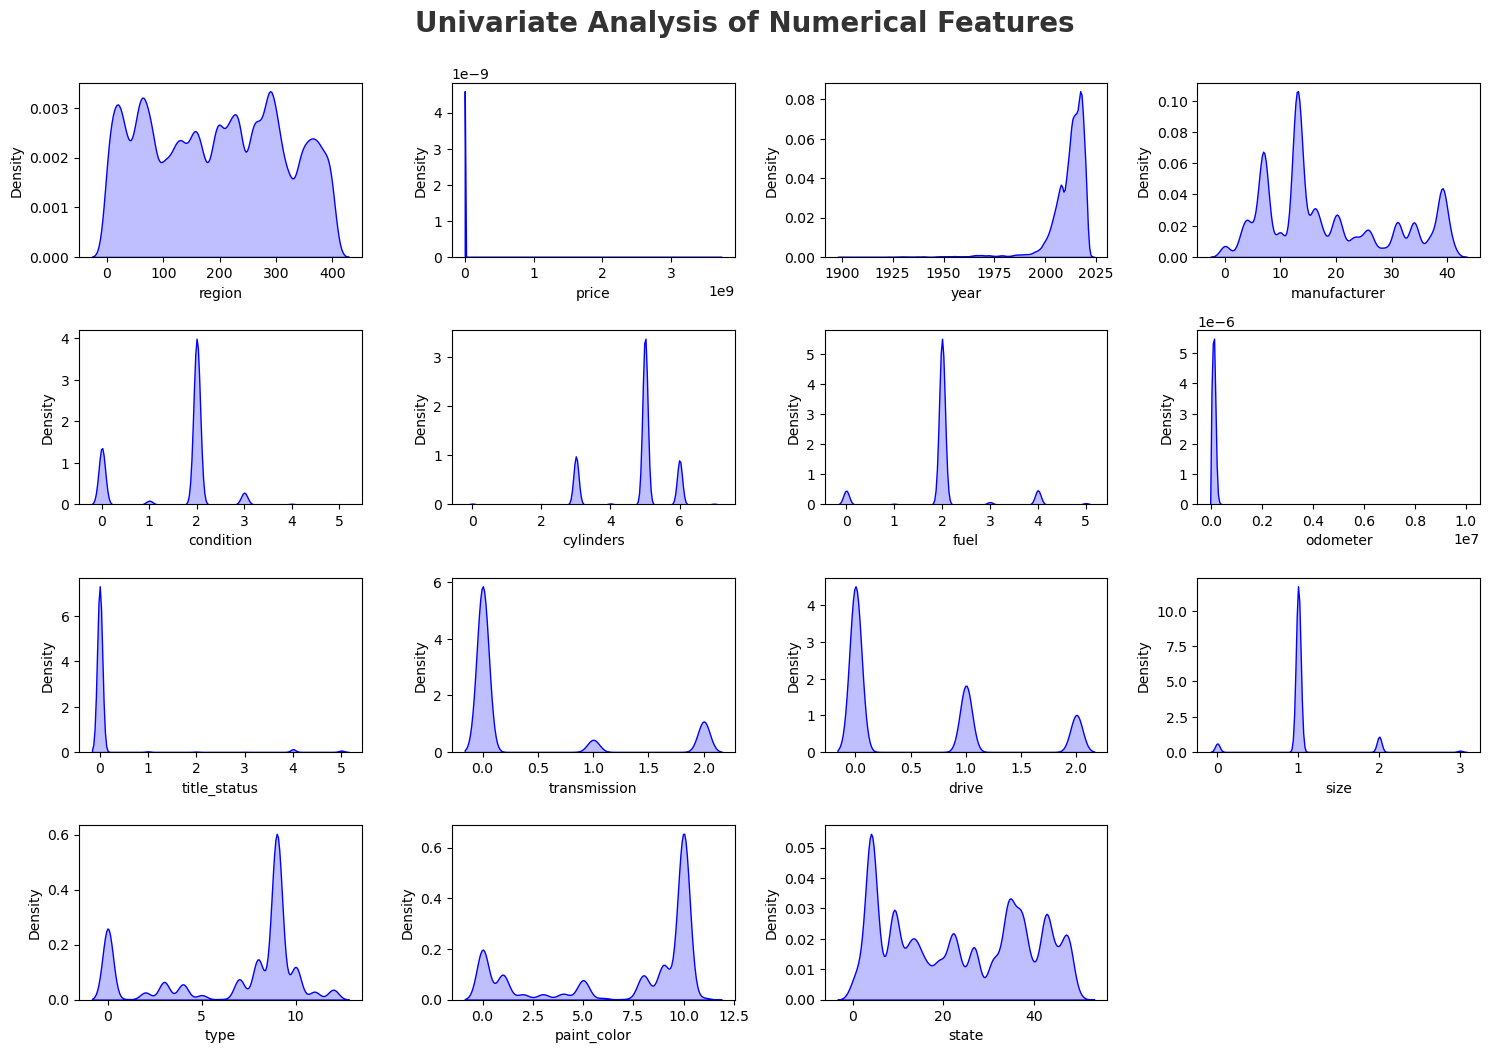

In [65]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))
###The suptitle() method figure module of matplotlib library is used to Add a centered title to the figure.
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(6,4,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: title={'center': 'price'}, xlabel='drive'>

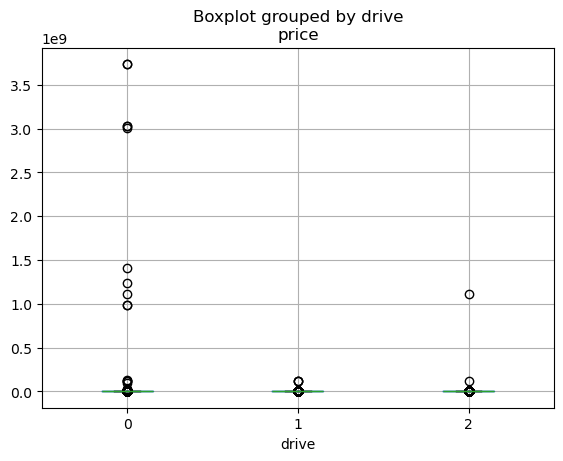

In [67]:
df.boxplot(by="drive",column=['price'])


<Axes: title={'center': 'price'}, xlabel='fuel'>

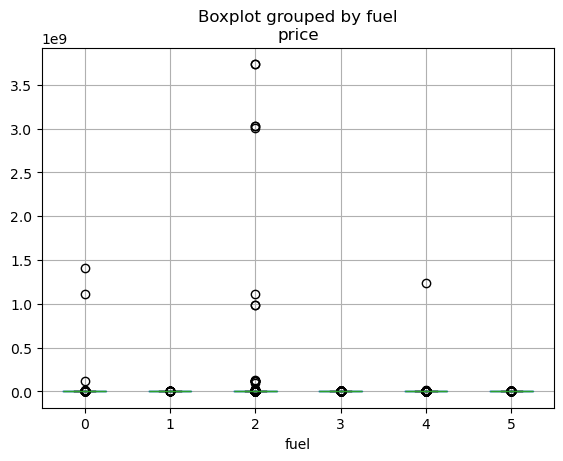

In [69]:
df.boxplot(by="fuel",column=['price'])


In [71]:
#df.boxplot(by="odometer",column=['price'])


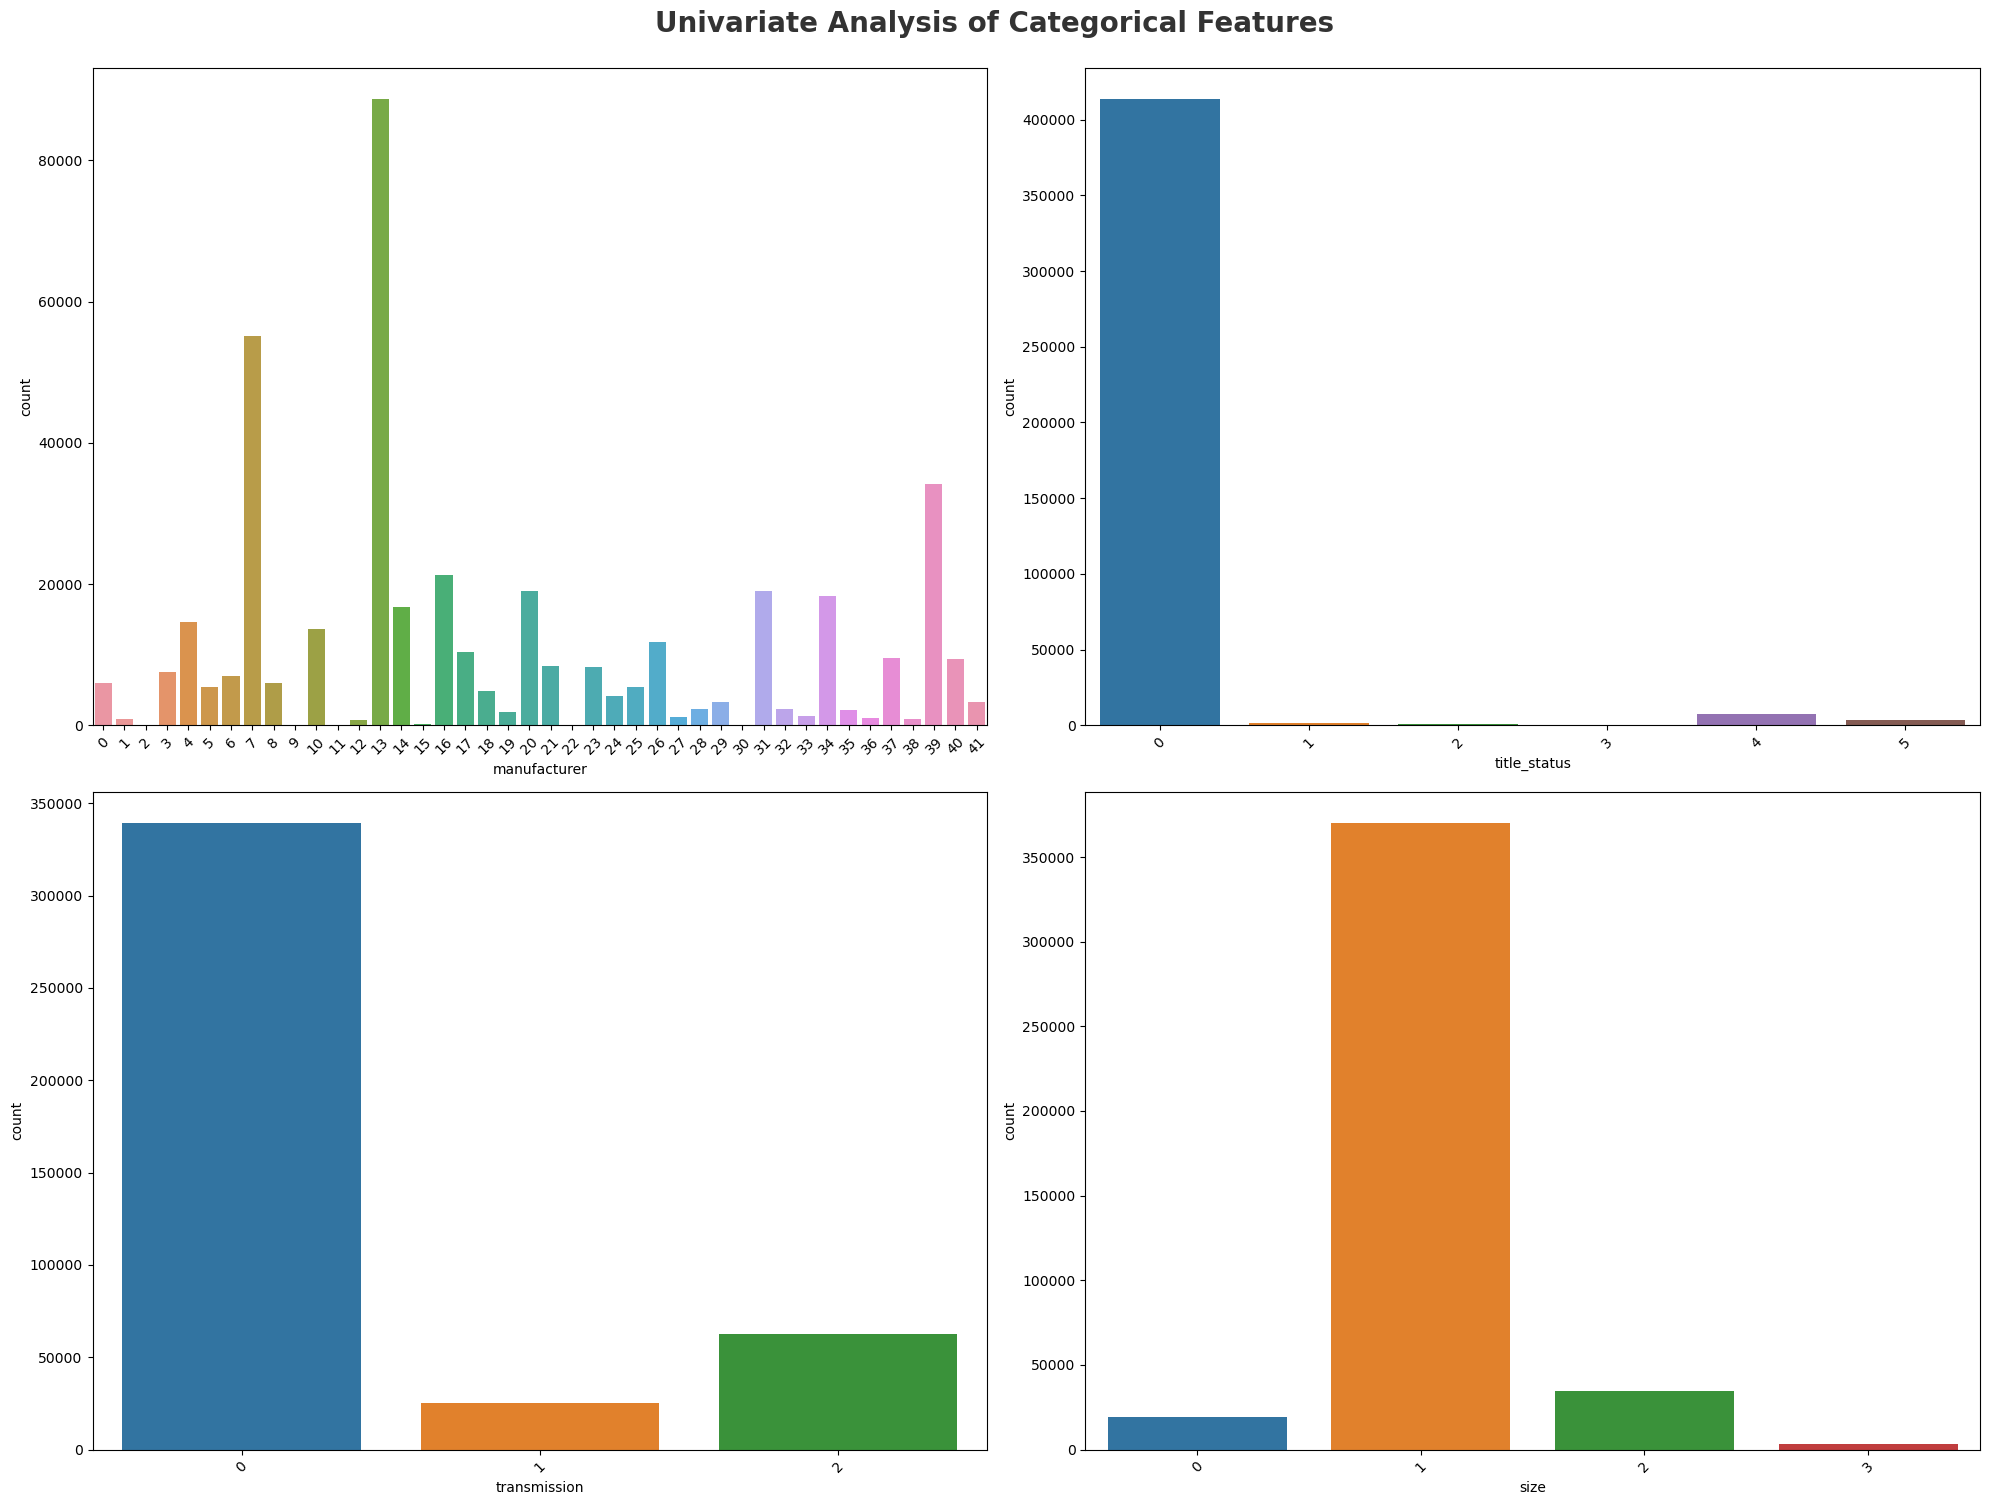

In [73]:
import warnings
warnings.filterwarnings('ignore')

##categorical features
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
cat1 = ['manufacturer', 'title_status', 'transmission', 'size' ]

for i in range(len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

(array([4.26869e+05, 0.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 3.73692871e+08, 7.47385742e+08, 1.12107861e+09,
        1.49477148e+09, 1.86846436e+09, 2.24215723e+09, 2.61585010e+09,
        2.98954297e+09, 3.36323584e+09, 3.73692871e+09]),
 <BarContainer object of 10 artists>)

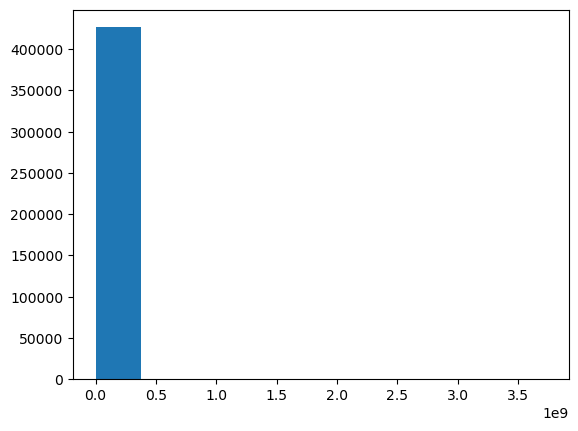

In [75]:
plt.hist(df['price'])
#We have 8 numeric_features: ['id', 'price', 'year', 'condition', 'fuel', 'odometer', 'drive', 'paint_color']
#We have 10 categorical_features: ['region', 'manufacturer', 'model', 'cylinders', 'title_status', 'transmission', 'VIN', 'size', 'type', 'state']

(array([101467.,      0.,   6769.,      0., 295560.,      0.,  21178.,
             0.,   1305.,    601.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

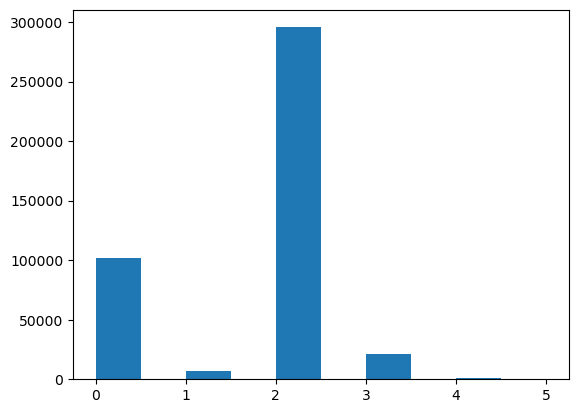

In [77]:
plt.hist(df['condition'])

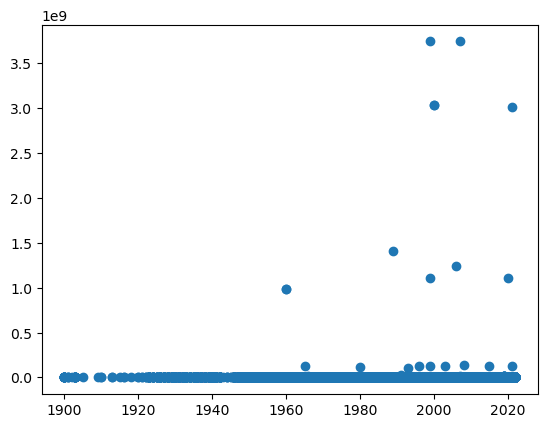

In [79]:
plt.scatter(df['year'], df['price'])
#sns.jointplot(data=df, x="year", y="price", kind="hex")


<Axes: xlabel='year', ylabel='Density'>

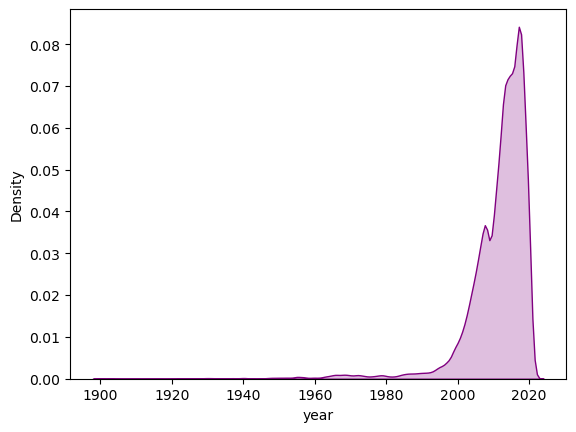

In [80]:
sns.kdeplot(df['year'], color='purple', shade=True)

<Axes: xlabel='title_status', ylabel='price'>

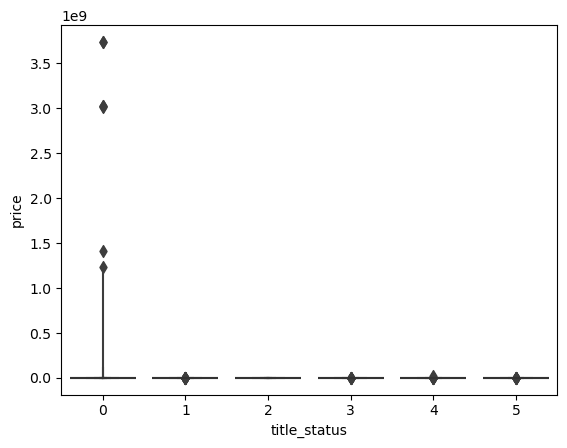

In [82]:
sns.boxenplot(x = 'title_status', y = 'price', data =df)


In [85]:
#sns.pairplot(df, hue = 'fuel')


In [87]:
df[numeric_features].corr()

region     price      year  manufacturer  condition  \
region        1.000000 -0.001412 -0.003369      0.001590  -0.019486   
price        -0.001412  1.000000 -0.004928      0.002565  -0.000185   
year         -0.003369 -0.004928  1.000000      0.041177   0.089797   
manufacturer  0.001590  0.002565  0.041177      1.000000  -0.015723   
condition    -0.019486 -0.000185  0.089797     -0.015723   1.000000   
cylinders    -0.008109  0.002959 -0.079911     -0.150438   0.087217   
fuel         -0.003007 -0.000919  0.092939     -0.015072   0.079624   
odometer     -0.001229  0.010032 -0.156986     -0.001387  -0.029046   
title_status -0.007796 -0.000870 -0.020469      0.013716  -0.009564   
transmission -0.015237 -0.000684  0.125838     -0.000538   0.159113   
drive         0.012725 -0.002752 -0.122517     -0.053653  -0.049209   
size         -0.006994  0.001110 -0.026477      0.006119  -0.058378   
type          0.000882  0.002001 -0.030062      0.032539   0.064228   
paint_color  -0.001181  0.001545 -0.011114      0.003782   0.025194   
state        -0.037331 -0.000723  0.011299     -0.011803   0.039773   

              cylinders      fuel  odometer  title_status  transmission  \
region        -0.008109 -0.003007 -0.001229     -0.007796     -0.015237   
price          0.002959 -0.000919  0.010032     -0.000870     -0.000684   
year          -0.079911  0.092939 -0.156986     -0.020469      0.125838   
manufacturer  -0.150438 -0.015072 -0.001387      0.013716     -0.000538   
condition      0.087217  0.079624 -0.029046     -0.009564      0.159113   
cylinders      1.000000 -0.033719  0.009742     -0.063758      0.097849   
fuel          -0.033719  1.000000 -0.065133     -0.012412      0.238589   
odometer       0.009742 -0.065133  1.000000      0.009949     -0.100057   
title_status  -0.063758 -0.012412  0.009949      1.000000     -0.051961   
transmission   0.097849  0.238589 -0.100057     -0.051961      1.000000   
drive         -0.071835  0.030431 -0.011837      0.007529      0.044113   
size          -0.048645 -0.017765  0.011451      0.012548     -0.060702   
type           0.060701 -0.098782  0.025518      0.009286     -0.026217   
paint_color    0.048656 -0.055625  0.015152     -0.011311     -0.050030   
state          0.026484 -0.023387 -0.001032      0.003486     -0.009129   

                 drive      size      type  paint_color     state  
region        0.012725 -0.006994  0.000882    -0.001181 -0.037331  
price        -0.002752  0.001110  0.002001     0.001545 -0.000723  
year         -0.122517 -0.026477 -0.030062    -0.011114  0.011299  
manufacturer -0.053653  0.006119  0.032539     0.003782 -0.011803  
condition    -0.049209 -0.058378  0.064228     0.025194  0.039773  
cylinders    -0.071835 -0.048645  0.060701     0.048656  0.026484  
fuel          0.030431 -0.017765 -0.098782    -0.055625 -0.023387  
odometer     -0.011837  0.011451  0.025518     0.015152 -0.001032  
title_status  0.007529  0.012548  0.009286    -0.011311  0.003486  
transmission  0.044113 -0.060702 -0.026217    -0.050030 -0.009129  
drive         1.000000  0.043882  0.018234    -0.077967 -0.045447  
size          0.043882  1.000000 -0.091181    -0.045612  0.012294  
type          0.018234 -0.091181  1.000000     0.124740 -0.002976  
paint_color  -0.077967 -0.045612  0.124740     1.000000 -0.012517  
state        -0.045447  0.012294 -0.002976    -0.012517  1.000000

In [89]:
#4: odometer has 0.01 strongest correlation to price 
#5: Year has a strong correlation of -0.004 to price
#6: manufacturer, type, cylinders and drive have similar strength correclation of appr 0.002
#8: size,paint_color and region have correclation of appr 0.001

The Explained Variance Ratio for
PCA= 2 is 20.19%
PCA= 3 is 28.77%
PCA= 4 is 36.37%
PCA= 5 is 43.61%
PCA= 6 is 50.77%
PCA= 7 is 57.79%
PCA= 8 is 64.76%
PCA= 9 is 71.45%
PCA=10 is 77.94%
PCA=11 is 84.07%
PCA=12 is 89.82%
PCA=13 is 95.20%


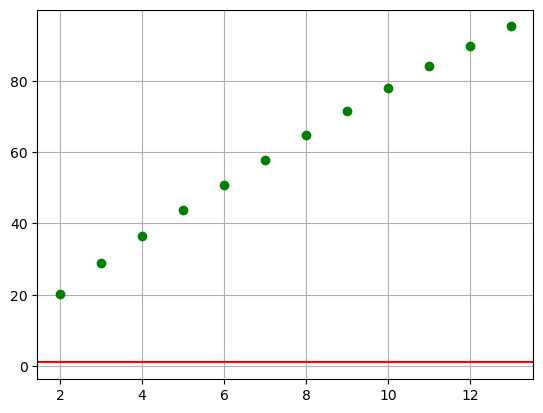

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pn = []
features = df.columns[:-1]
print ('The Explained Variance Ratio for')
for n in range (2, len(df.columns[:-1])):
   # Separating out the features
   x = df.loc[:, features].values
  
   # Separating out the target
   y = df.loc[:,['price']].values
  
   x = StandardScaler().fit_transform(x)
  
   # creating a pca object and specifying the number of principal components
   pca = PCA(n_components=n)
   # applying fit and transforming x
   principalComponents = pca.fit_transform(x)
  
   pnx = round((pca.explained_variance_ratio_.sum()*100),2)
   pn.append(pnx)
  
   print ('PCA={:2} is {:.2f}%'.format(n,pnx))
   plt.plot (n, pnx, marker='o', linestyle='--', color='green')

plt.axhline(y=1, color='r', linestyle='-')
plt.grid(True)
# Show the plot
plt.show()

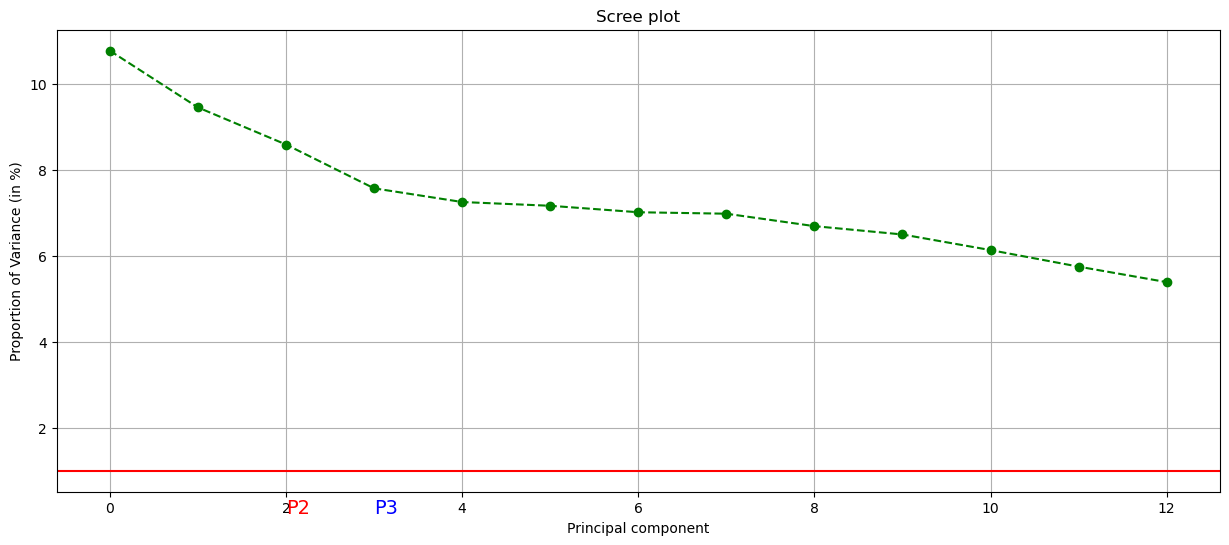

In [93]:
# Plot the scree plot
plt.figure(figsize=(15, 6))
plt.plot(pca.explained_variance_ratio_ *100, marker='o', linestyle='--', color='green')
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Proportion of Variance (in %)')


# Add a horizontal line at 1
plt.axhline(y=1, color='r', linestyle='-')
plt.text(2, 0, 'P2', color='red', fontsize=14)
plt.text(3, 0, 'P3', color='blue', fontsize=14)


plt.grid(True)
# Show the plot
plt.show()


In [95]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
u, s, vh = np.linalg.svd(df, full_matrices=False)


cumulative_sum_s = np.cumsum(s)


total_sum_s = np.sum(s)
normalized_cumulative_sum_s = cumulative_sum_s / total_sum_s


normalized_cumulative_sum_df = pd.DataFrame({
   'Principal Component': np.arange(1, len(normalized_cumulative_sum_s) + 1),
   'Normalized Cumulative Sum of Singular Values': normalized_cumulative_sum_s
})
normalized_cumulative_sum_df


Principal Component  Normalized Cumulative Sum of Singular Values
0                     1                                      0.980975
1                     2                                      0.999840
2                     3                                      0.999987
3                     4                                      0.999997
4                     5                                      0.999998
5                     6                                      0.999999
6                     7                                      0.999999
7                     8                                      1.000000
8                     9                                      1.000000
9                    10                                      1.000000
10                   11                                      1.000000
11                   12                                      1.000000
12                   13                                      1.000000
13                   14                                      1.000000
14                   15                                      1.000000

In [97]:
# Create a heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5)


In [99]:
X = df
mu = X.mean()
sigma = X.std()
Xnorm = (X - mu)/sigma

In [101]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
U, s, Vt = svd(Xnorm,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

In [103]:
r = 4
Ur = U[:,:r]
Sigmar = Sigma[:r,:r]
Xrr = pd.DataFrame(Ur@Sigmar)

<Axes: xlabel='price', ylabel='fuel'>

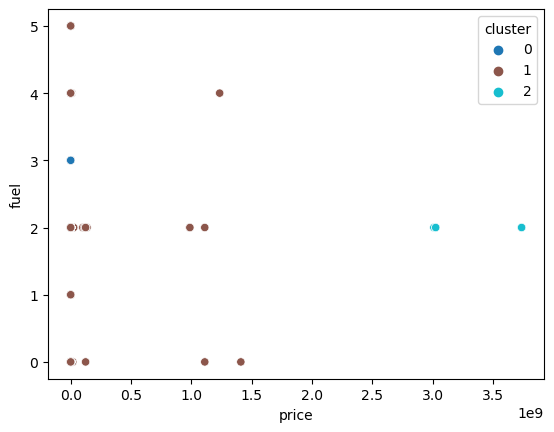

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='random').fit(X)
X['cluster'] = kmeans.predict(X)
sns.scatterplot(data=X,x='price',y='fuel', 
                hue='cluster', 
                palette=sns.color_palette('tab10', as_cmap=True))

<Axes: xlabel='price', ylabel='condition'>

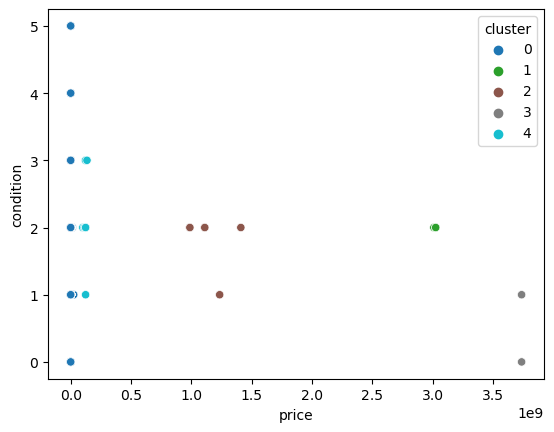

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++').fit(X)
X['cluster'] = kmeans.predict(X)
sns.scatterplot(data=X,x='price',y='condition', 
                hue='cluster', 
                palette=sns.color_palette('tab10', as_cmap=True))

<Axes: xlabel='price', ylabel='manufacturer'>

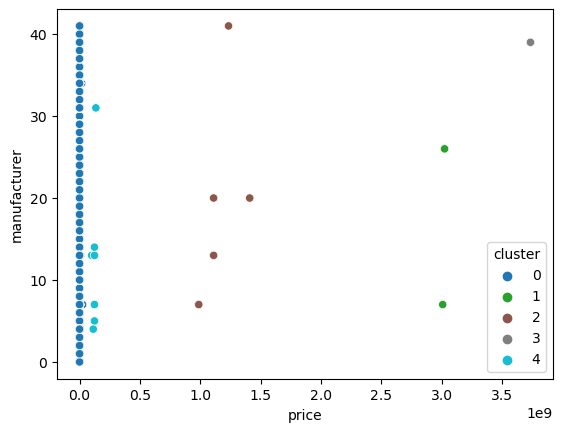

In [112]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=9, min_samples=3).fit(X)
sns.scatterplot(data=X,x='price',y='manufacturer', 
                hue='cluster', 
                palette=sns.color_palette('tab10', as_cmap=True))

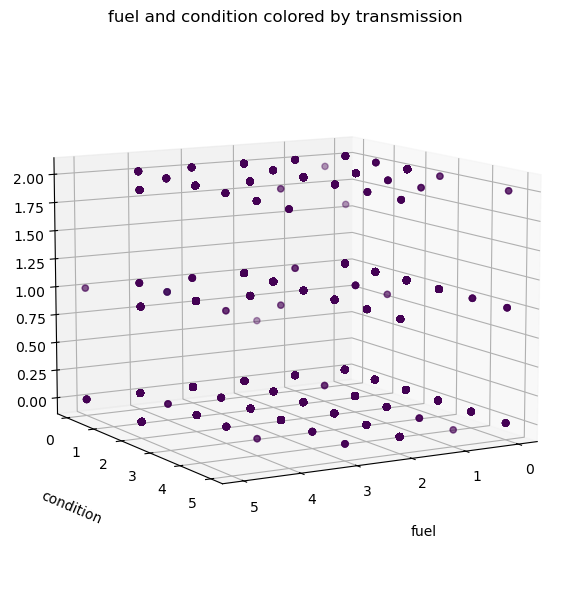

In [114]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(X['fuel'], X['condition'], X['transmission'], c = X['price'], alpha = 0.4)
ax.set_xlabel('fuel', labelpad = 20)
ax.set_ylabel('condition', labelpad = 20)
ax.set_zlabel('transmission', labelpad = 20)
ax.view_init(10, 60)
plt.title('fuel and condition colored by transmission')
plt.tight_layout();


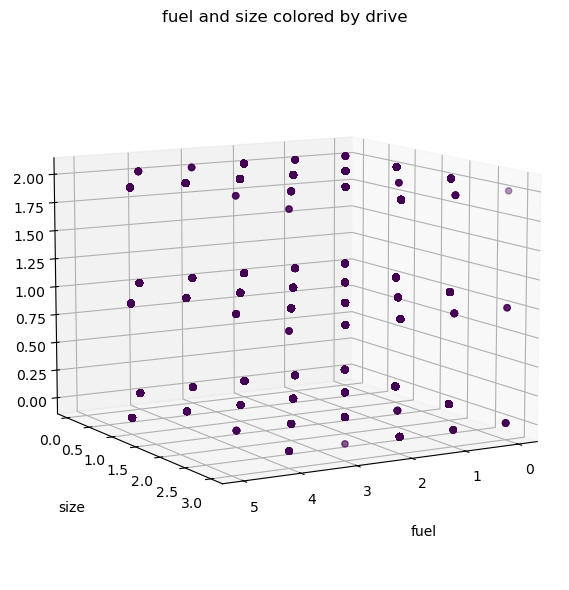

In [115]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(X['fuel'], X['size'], X['drive'], c = X['price'], alpha = 0.4)
ax.set_xlabel('fuel', labelpad = 20)
ax.set_ylabel('size', labelpad = 20)
ax.set_zlabel('drive', labelpad = 20)
ax.view_init(10, 60)
plt.title('fuel and size colored by drive')
plt.tight_layout();


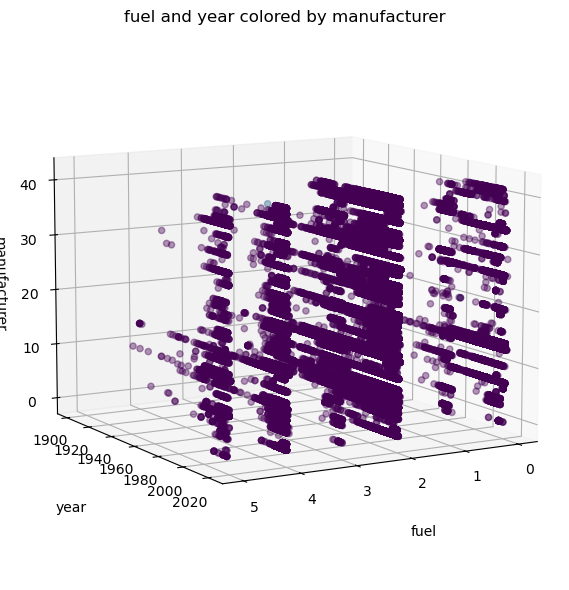

In [116]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(X['fuel'], X['year'], X['manufacturer'], c = X['price'], alpha = 0.4)
ax.set_xlabel('fuel', labelpad = 20)
ax.set_ylabel('year', labelpad = 20)
ax.set_zlabel('manufacturer')
ax.view_init(10, 60)
plt.title('fuel and year colored by manufacturer')
plt.tight_layout();

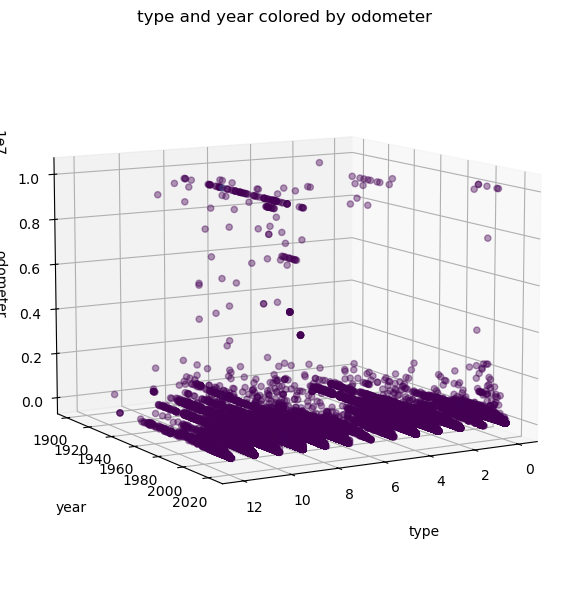

In [117]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(X['type'], X['year'], X['odometer'], c = X['price'], alpha = 0.4)
ax.set_xlabel('type', labelpad = 20)
ax.set_ylabel('year', labelpad = 20)
ax.set_zlabel('odometer')
ax.view_init(10, 60)
plt.title('type and year colored by odometer')
plt.tight_layout();


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [122]:
#Zen of Python: simple is better than complex
#Regression with odometer

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#set aside the features I want to use to predict ie odometer
features = df["odometer"].values.reshape(-1, 1) 

#set aside what I want to predict.
price = df["price"]

#tell the linear model library that I want a linear regression object.
first_degree_model = ''
first_degree_mse = ''

from sklearn import linear_model

first_degree_model = LinearRegression(fit_intercept=False)
first_degree_model.fit(features, price)

LinearRegression(fit_intercept=False)

In [124]:
print("Coefficients:", first_degree_model.coef_)


Coefficients: [0.60807876]


In [126]:
#first degree mse
first_degree_mse = mean_squared_error(first_degree_model.predict(features), price)
print(type(first_degree_model))
print(first_degree_model.coef_)
print(first_degree_mse)

<class 'sklearn.linear_model._base.LinearRegression'>
[0.60807876]
148393010018749.62


In [128]:
#Building a quadratic model

df['odo2'] = df['odometer']**2

In [130]:
X = df[['odometer', 'odo2']]
y = df['price']
quadratic_model = LinearRegression().fit(X, y)
quad_mse = mean_squared_error(quadratic_model.predict(X), y)
print(quadratic_model.coef_)
print(quadratic_model.intercept_)
print(quad_mse)

[3.33048411e-01 2.89613672e-08]
40949.4462258723
148392289299173.7


In [132]:
### Plotting Predictions

In [134]:
x_for_pred = df[['odometer', 'odo2']].sort_values(by = 'odometer')
x_for_pred.head()

odometer  odo2
297137       0.0   0.0
194126       0.0   0.0
71625        0.0   0.0
194112       0.0   0.0
194090       0.0   0.0

In [136]:
### Comparing the model performance
## noted that quadratic has better performance 

In [138]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
#### Creating Quadratic Features Instantiate a `PolynomialFeatures()` transformer
pfeatures = PolynomialFeatures()
quad_features = pfeatures.fit_transform(df[['odometer']])

In [140]:
#Use the transformed array quad_features to create a DataFrame of the transformed data and drop bias
poly_features_df = ''
pfeatures = PolynomialFeatures()
quad_features = pfeatures.fit_transform(df[['odometer']])
poly_features_df = pd.DataFrame(quad_features, columns=pfeatures.get_feature_names_out()).iloc[:, 1:]
print(poly_features_df.shape)
poly_features_df.head()

(426880, 2)


odometer    odometer^2
0  100000.0  1.000000e+10
1  100000.0  1.000000e+10
2  100000.0  1.000000e+10
3  100000.0  1.000000e+10
4  100000.0  1.000000e+10

In [142]:
### DataFrame with Cubic Features
cubic_features_df = ''
pfeatures = PolynomialFeatures(degree = 3)
cubic_features = pfeatures.fit_transform(df[['odometer']])
cubic_features_df = pd.DataFrame(cubic_features, columns=pfeatures.get_feature_names_out()).iloc[:, 1:]
print(cubic_features_df.shape)
cubic_features_df.head()

(426880, 3)


odometer    odometer^2    odometer^3
0  100000.0  1.000000e+10  1.000000e+15
1  100000.0  1.000000e+10  1.000000e+15
2  100000.0  1.000000e+10  1.000000e+15
3  100000.0  1.000000e+10  1.000000e+15
4  100000.0  1.000000e+10  1.000000e+15

In [144]:
### Experimenting with Multiple Features
cubic_features_df = ''
pfeatures = PolynomialFeatures(degree = 2)
two_features = pfeatures.fit_transform(df[['odometer', 'year']])
two_feature_poly_df = pd.DataFrame(two_features, columns=pfeatures.get_feature_names_out()).iloc[:, 1:]
print(two_feature_poly_df.shape)
two_feature_poly_df.head()


(426880, 5)


odometer    year    odometer^2  odometer year     year^2
0  100000.0  2017.0  1.000000e+10    201700000.0  4068289.0
1  100000.0  2017.0  1.000000e+10    201700000.0  4068289.0
2  100000.0  2017.0  1.000000e+10    201700000.0  4068289.0
3  100000.0  2017.0  1.000000e+10    201700000.0  4068289.0
4  100000.0  2017.0  1.000000e+10    201700000.0  4068289.0

In [146]:
#combine the transformer with an estimator using scikitlearn's pipeline utilities. 

In [148]:
import numpy as np
import pandas as pd
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])
print(type(pipe))
print(pipe.named_steps)

<class 'sklearn.pipeline.Pipeline'>
{'quad_features': PolynomialFeatures(), 'quad_model': LinearRegression()}


In [150]:
### Fitting the Pipeline
X = ''
y = ''

quad_pipe_mse = ''
pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])
X = df[['odometer']]
y = df['price']
pipe.fit(X, y)
quad_pipe_mse = float(mean_squared_error(y, pipe.predict(X)))
print(type(quad_pipe_mse))
print(quad_pipe_mse)

<class 'float'>
148392289299173.78


In [152]:
### Examining the Coefficients
quad_reg = '' #regressor from pipeline
coefs = '' #coefficients of regressor
pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2)), ('quad_model', LinearRegression())])
X = df[['odometer']]
y = df['price']
pipe.fit(X, y)
quad_reg = pipe.named_steps['quad_model']
coefs = quad_reg.coef_
print(type(quad_reg))
print(coefs)

<class 'sklearn.linear_model._base.LinearRegression'>
[0.00000000e+00 3.33048411e-01 2.89613672e-08]


In [154]:
### Considering the Bias 
pipe_no_bias = '' #pipeline with no bias in transformer
no_bias_mse = '' #mean squared error of new model
pipe_no_bias = Pipeline([('quad_features', PolynomialFeatures(degree = 2, include_bias=False)), ('quad_model', LinearRegression())])
X = df[['odometer']]
y = df['price']
pipe_no_bias.fit(X, y)
no_bias_mse = float(mean_squared_error(y, pipe_no_bias.predict(X)))
print(type(pipe_no_bias))
print(no_bias_mse)

<class 'sklearn.pipeline.Pipeline'>
148392289299173.7


In [156]:
#Building a Cubic Model with Pipeline

cubic_pipe = '' #pipeline with no bias in 3rd degree transformer
cubic_mse = '' #mean squared error of new model
cubic_pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 3, include_bias=False)), ('quad_model', LinearRegression())])
cubic_pipe.fit(X, y)
cubic_mse = float(mean_squared_error(y, cubic_pipe.predict(X)))
print(type(cubic_pipe))
print(cubic_mse)

<class 'sklearn.pipeline.Pipeline'>
148390739232678.72


In [158]:
### Making Predictions on New Data
cube_predict = '' #cubic pipe prediction

cube_predict = cubic_pipe.predict(np.array([[30112.0]]))
print(type(cube_predict))
print(cube_predict)
#actual price value : 28990

<class 'numpy.ndarray'>
[35299.84521608]


In [160]:
### The Sample
X = df.loc[:,['odometer']]
y = df['price']
sample = df.sample(10, random_state = 22)
X_train = sample.loc[:, ['odometer']]
y_train = sample['price']

#### Iterate on Models

model_predictions = {f'degree_{i}': None for i in range(1, 11)}
for i in range(1, 11):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = False)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_train)
    model_predictions[f'degree_{i}'] = preds

model_predictions['degree_1'][:10]

array([19176.78619674, 21327.80033254, 35617.69606576,  3445.93173515,
       32080.908855  ,  5094.87905955, 24523.41757033, 38520.46143602,
       13262.60103634, 15470.51771257])

In [162]:
#### DataFrame of Predictions
pred_df = pd.DataFrame(model_predictions)
print(type(pred_df))
print(pred_df.head())

<class 'pandas.core.frame.DataFrame'>
       degree_1      degree_2      degree_3      degree_4      degree_5  \
0  19176.786197  19901.127248  18831.453997  20809.079793  22736.958874   
1  21327.800333  22070.651610  23439.258661  27491.245462  29130.816417   
2  35617.696066  35151.132175  36681.904816  34345.832783  33248.251647   
3   3445.931735   2439.612216   6644.235178  10970.644742  13541.985063   
4  32080.908855  32129.362316  38510.128562  38963.610118  36017.107762   

       degree_6      degree_7      degree_8      degree_9     degree_10  
0  22006.838727  19477.012795  17632.890926  17644.818484  18973.522738  
1  27221.421452  24434.472975  23361.289507  24217.666929  25885.102680  
2  34581.390952  36655.090647  37937.832609  38078.492341  37499.467046  
3  13514.951021  11130.975311   7932.910037   5480.267727   4127.182950  
4  34940.490590  36030.744833  37335.757987  37733.157012  37337.871521  


In [164]:
#DataFrame of Errors
error_df = pred_df.subtract(y, axis = 0)
error_df


degree_1      degree_2      degree_3      degree_4      degree_5  \
0       13176.786197  13901.127248  12831.453997  14809.079793  16736.958874   
1        9427.800333  10170.651610  11539.258661  15591.245462  17230.816417   
2       14617.696066  14151.132175  15681.904816  13345.832783  12248.251647   
3        1945.931735    939.612216   5144.235178   9470.644742  12041.985063   
4       27180.908855  27229.362316  33610.128562  34063.610118  31117.107762   
...              ...           ...           ...           ...           ...   
426875           NaN           NaN           NaN           NaN           NaN   
426876           NaN           NaN           NaN           NaN           NaN   
426877           NaN           NaN           NaN           NaN           NaN   
426878           NaN           NaN           NaN           NaN           NaN   
426879           NaN           NaN           NaN           NaN           NaN   

            degree_6      degree_7      degree_8      degree_9     degree_10  
0       16006.838727  13477.012795  11632.890926  11644.818484  12973.522738  
1       15321.421452  12534.472975  11461.289507  12317.666929  13985.102680  
2       13581.390952  15655.090647  16937.832609  17078.492341  16499.467046  
3       12014.951021   9630.975311   6432.910037   3980.267727   2627.182950  
4       30040.490590  31130.744833  32435.757987  32833.157012  32437.871521  
...              ...           ...           ...           ...           ...  
426875           NaN           NaN           NaN           NaN           NaN  
426876           NaN           NaN           NaN           NaN           NaN  
426877           NaN           NaN           NaN           NaN           NaN  
426878           NaN           NaN           NaN           NaN           NaN  
426879           NaN           NaN           NaN           NaN           NaN  

[426880 rows x 10 columns]

In [166]:
#Using Validation to Select the Best Combination of Parameters

In [168]:
#4: odometer has 0.01 strongest correlation to price 
#5: year has a strong correlation of -0.004 to price
#6: manufacturer, type, cylinders and drive have similar strength correclation of appr 0.002
#8: size,paint_color and region have correclation of appr 0.001 so deleting them and others
X_train, X_test, y1_train, y1_test = '', '', '', ''
X_train, X_test, y1_train, y1_test = train_test_split(df[['price']], df['odometer'], random_state = 32, test_size=.3)
print(df['year'].shape, X_train.shape, X_test.shape)
print(X_train.head())

(426880,) (298816, 1) (128064, 1)
        price
28832    6000
320790  20995
76842    4995
397705   7700
278840   5500


In [170]:
y2_train, y2_test = '', ''
y3_train, y3_test = '', ''

### BEGIN SOLUTION
y2_train, y2_test, y3_train, y3_test = train_test_split(df['year'], df['manufacturer'], random_state = 32, test_size=.3)
### END SOLUTION

# Answer check
print(df['year'].shape, y2_train.shape, y2_test.shape)
print(y2_train.head())

(426880,) (298816,) (128064,)
28832     1995.0
320790    2003.0
76842     2007.0
397705    2007.0
278840    2012.0
Name: year, dtype: float64


In [172]:
train_mses = []
test_mses = []

#for complexity 1 - 20:

    #create pipeline with PolynomialFeatures and LinearRegression
    #remember to set include_bias = False
    
    #fit pipeline on training data
    
    #mse of training data
    
    #mse of testing data

best_model_complexity = ''

### BEGIN SOLUTION
train_mses = []
test_mses = []
for i in range(1, 21):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X_train, y1_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y1_train, train_preds))
    test_mses.append(mean_squared_error(y1_test, test_preds))
    
best_model_complexity = test_mses.index(min(test_mses)) + 1

The Complexity that minimized Test Error was: 10


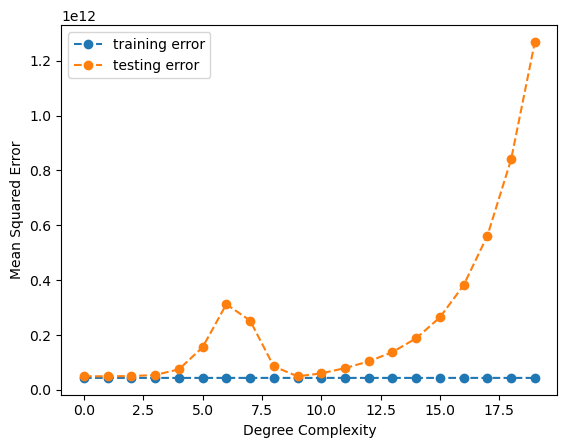

In [173]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot( train_mses, '--o', label = 'training error')
plt.plot(test_mses, '--o', label = 'testing error')
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

In [182]:

def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    for i in range(1, 21):
        pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                         ('linreg', LinearRegression())])
        pipe.fit(X_train, y_train)
        test_preds = pipe.predict(X_test)
        test_mse = mean_squared_error(y_test, test_preds)
        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe
        return best_pipe
### END SOLUTION

best_model = simple_cross_validation(X_train, y2_train, X_test, y2_test)
best_model.get_params() #should be degree = 10

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=1, include_bias=False)),
  ('linreg', LinearRegression())],
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=1, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 1,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

The model score value is:  1.000


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [184]:
df.columns


Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'cluster', 'odo2'],
      dtype='object')

In [186]:
#4: odometer has 0.01 strongest correlation to price 
#5: year has a strong correlation of -0.004 to price
#6: manufacturer, type, cylinders and drive have similar strength correclation of appr 0.002
#8: size,paint_color and region have correclation of appr 0.001 so deleting them and others

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder

oe = OrdinalEncoder()
df['odometer_transformed']= oe.fit_transform(df[['odometer']])
df[['odometer','odometer_transformed']]

odometer  odometer_transformed
0       100000.0               56292.0
1       100000.0               56292.0
2       100000.0               56292.0
3       100000.0               56292.0
4       100000.0               56292.0
...          ...                   ...
426875   32226.0               17377.0
426876   12029.0                5329.0
426877    4174.0                1801.0
426878   30112.0               15982.0
426879   22716.0               11306.0

[426880 rows x 2 columns]

In [188]:
df = df.drop(['odometer'], axis = 1)


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X = df.drop(['paint_color','state','cylinders'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
ms = model.score(X_test, y_test)

print(f'The model score value is:  {ms:.3f}')

The model score value is:  1.000


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [194]:
#Summary of Key Points
#Year of Make Distribution:

#The majority of cars in the dataset were manufactured between 2000 and 2020.
#Fuel Type and Outliers:

#Fuel type 2 shows outliers that are evenly distributed between left and right skewness.
#Drive Type and Outliers:

#Cars with drive type 0 exhibit right-skewed outliers.
#Odometer Reading and Price:

#Odometer reading has the strongest correlation (0.01) with car price among the variables analyzed.
#Year and Price:

#Year of manufacture has a relatively strong negative correlation (-0.004) with car price.
#Other Features and Price:

#Features like manufacturer, type, cylinders, and drive show similar weak correlations (~0.002) with car price.
#Features with Weak Correlation:

#Features such as size, paint color, and region have very weak correlations (~0.001) with car price, suggesting they may not significantly impact pricing decisions.
#Recommendations
#Focus on Odometer and Year: Given their stronger correlations with price, prioritize these features in pricing and valuation models.

#Consider Outlier Handling: Develop strategies to handle outliers in fuel type and drive type to improve model accuracy.

#Feature Selection: Delete features with very weak correlations (e.g., size, paint color, region) from further analysis to streamline modeling efforts.